# Matrix models in action

Let's generate a demographic transition matrix and a vector of initial population densities. Assume the following:
- Probability of staying juvenile = 0
- Probability of maturing = 0.1
- Probability of survival = 0.2
- Birth rate = 10
- Initial population of juveniles = 0
- Initial population of adults = 1

In [5]:
# Create a matrix and a vector of population densities
transition.matrix <- matrix(c(0,10,0.1,0.2),nrow=2,ncol=2,byrow=T)
pop.vector <- matrix(c(0,1),ncol=1) # Notice that we create a column vector

In [6]:
# project the population one time step into the future, where %*% operation is matrix multiplication
transition.matrix %*% pop.vector

10.0
0.2


In [7]:
# set up a for loop to project the population over a number of time steps.
# first set number of time steps
time.steps=50
for (t in 1:time.steps){
  (temp <- transition.matrix %*% pop.vector[,t])  
  (pop.vector <- as.matrix(cbind(pop.vector,temp)))
  }

In [8]:
# population vector now gives abundance of each stage at each time point, with juveniles in the first row and adults in the second
pop.vector

0,10.0,2.00,10.400,4.0800,11.21600,6.323200,12.4806400,8.819328,14.244506,⋯,298.25188,329.39776,364.1314,402.22404,444.57624,491.13929,542.80410,599.70011,662.74412,732.24894
1,0.2,1.04,0.408,1.1216,0.63232,1.248064,0.8819328,1.424451,1.166823,⋯,32.93978,36.41314,40.2224,44.45762,49.11393,54.28041,59.97001,66.27441,73.22489,80.91939


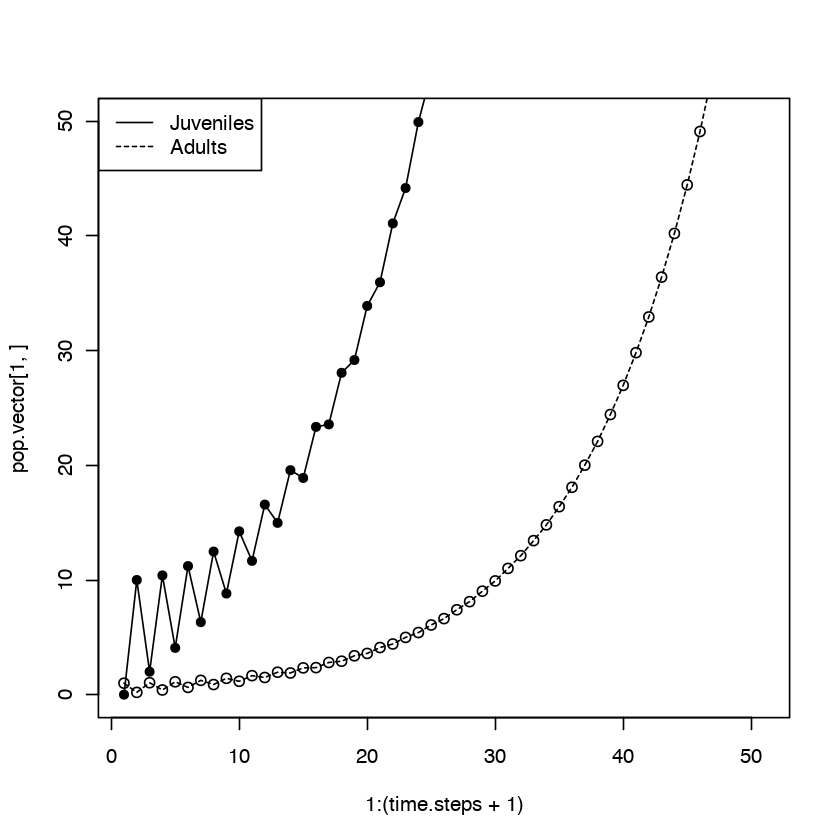

In [22]:
# plot the population trajectories
par(mfrow=c(1,1))
plot(1:(time.steps+1),pop.vector[1,],ylim=c(0,50),pch=16)
lines(1:(time.steps+1),pop.vector[1,])
points(1:(time.steps+1),pop.vector[2,],pch=1)
lines(1:(time.steps+1),pop.vector[2,],lty=2)
legend("topleft",legend = c("Juveniles","Adults"),lty = c(1,2))

In [21]:
#### population growth rate ####
# first calculate total population size after each timestep
(total.pop.sizes <- colSums(pop.vector))
# then create dataframe with initial and final population sizes for each timestep
dat <- as.data.frame(cbind(1:time.steps,total.pop.sizes[1:length(total.pop.sizes)-1],total.pop.sizes[2:length(total.pop.sizes)]))
names(dat) <- c("time.step","intial.pop.size","final.pop.size")
dat$growth <- dat$final.pop.size/dat$intial.pop.size

[1]   1.000000  10.200000   3.040000  10.808000   5.201600  11.848320
 [7]   7.571264  13.362573  10.243779  15.411329  13.326044  18.076537
[13]  16.941352  21.464808  21.234313  25.711670  26.376647  30.987000
[19]  32.574047  37.501809  40.074409  45.516691  49.177747  55.352241
[25]  60.248196  67.401880  73.728571  82.147594  90.158090 100.179212
[31] 110.193933 122.217999 134.637532 149.145505 164.466633 182.038832
[37] 200.874400 222.213712 245.317142 271.277140 299.572570 331.191654
[43] 365.810901 404.353834 446.681668 493.690168 545.419701 602.774108
[49] 665.974523 735.969013 813.168326

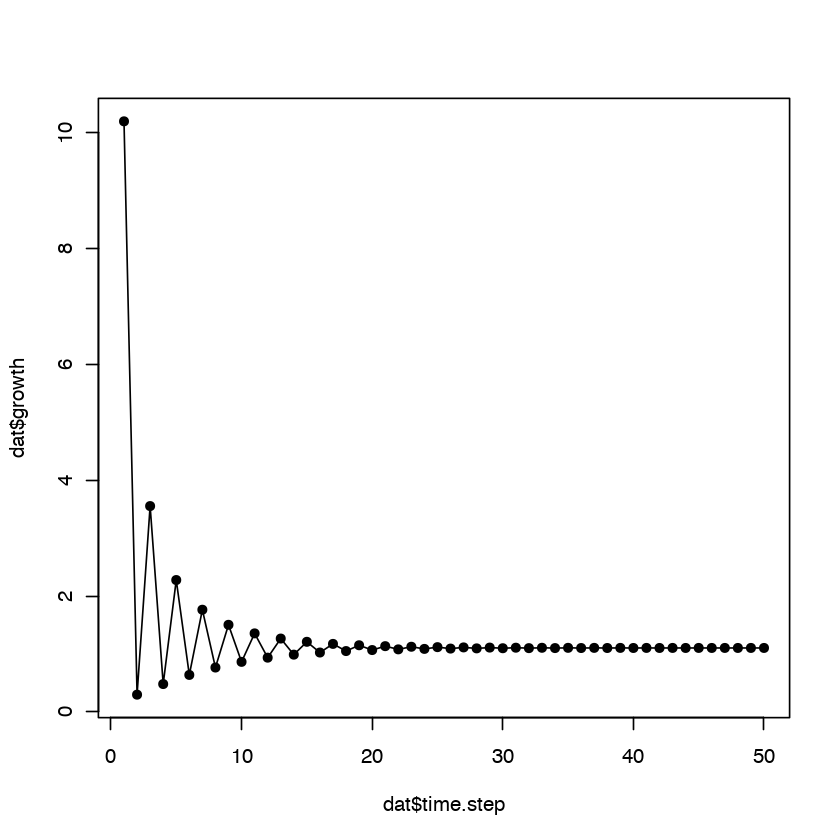

In [11]:
# plot the population growth rate
plot(dat$time.step,dat$growth,pch=16)
lines(dat$time.step,dat$growth)

In [12]:
# add a line on the plot showing the leading eigenvalue, which should be the population growth rate that the population converges on
# get the eigenvalues and eigenvectors
eigen(transition.matrix)
# add a line to the plot showing the growth rate represented by the leading eigenvalue
abline(h=eigen(transition.matrix)$value[1],col="red")


eigen() decomposition
$values
[1]  1.1049876 -0.9049876

$vectors
           [,1]        [,2]
[1,] -0.9939504 -0.99592997
[2,] -0.1098303  0.09013042


ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [13]:
#### stage/age distribution ####
# first plot the proportion of adults and juveniles in the population
# create dataframe with adults, juveniles and total population size, so can calculate proportions
dat2 <- as.data.frame(cbind(pop.vector[1,],pop.vector[2,],total.pop.sizes))
names(dat2) <- c("juveniles","adults","total.pop.size")
dat2$prop.juv <- dat2$juveniles/dat2$total.pop.size
dat2$prop.adults <- dat2$adults/dat2$total.pop.size
dat2$time.steps <- 1:51

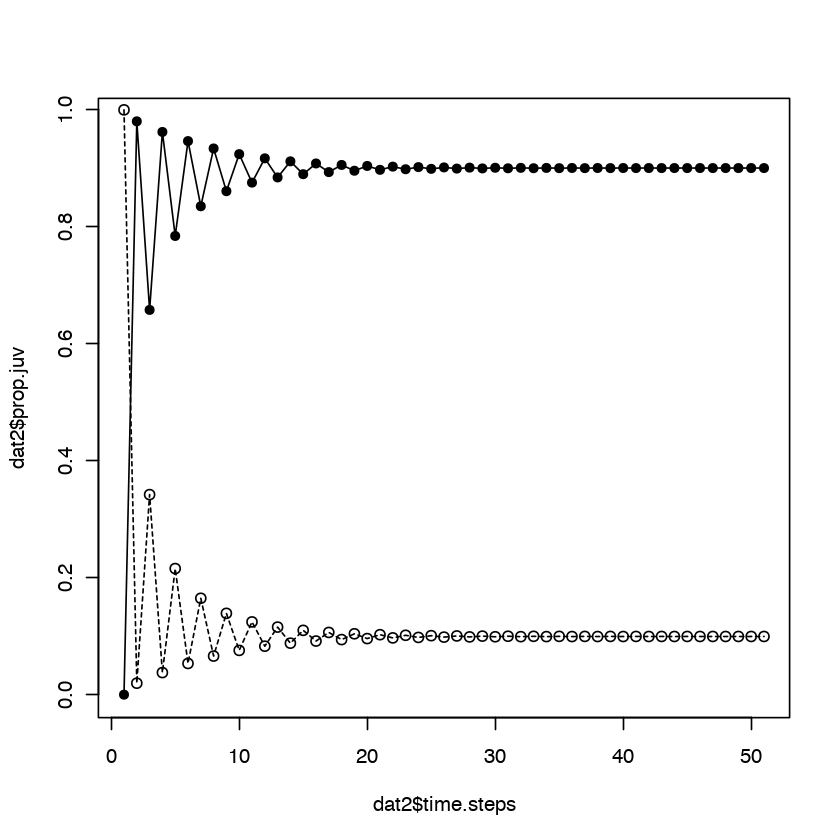

In [14]:
# plot the proportions in each class
plot(dat2$time.steps,dat2$prop.juv,pch=16)
lines(dat2$time.steps,dat2$prop.juv)
points(dat2$time.steps,dat2$prop.adults)
lines(dat2$time.steps,dat2$prop.adults,lty=2)

# now see if the proportions converge on those predicted by the eigenvector.  
eigen(transition.matrix)

# to get the predicted proportions you need to get the ratio of each element of the leading eigenvector over the sum of both elements of the leading eigenvector
(prop.juveniles.via.eigen <- eigen(transition.matrix)$vectors[1,1]/sum(eigen(transition.matrix)$vectors[,1]))
(prop.adults.via.eigen <- eigen(transition.matrix)$vectors[2,1]/sum(eigen(transition.matrix)$vectors[,1]))

# add these proportions to the plot to see if they converge
abline(h=prop.juveniles.via.eigen,col="red")
abline(h=prop.adults.via.eigen,col="red")

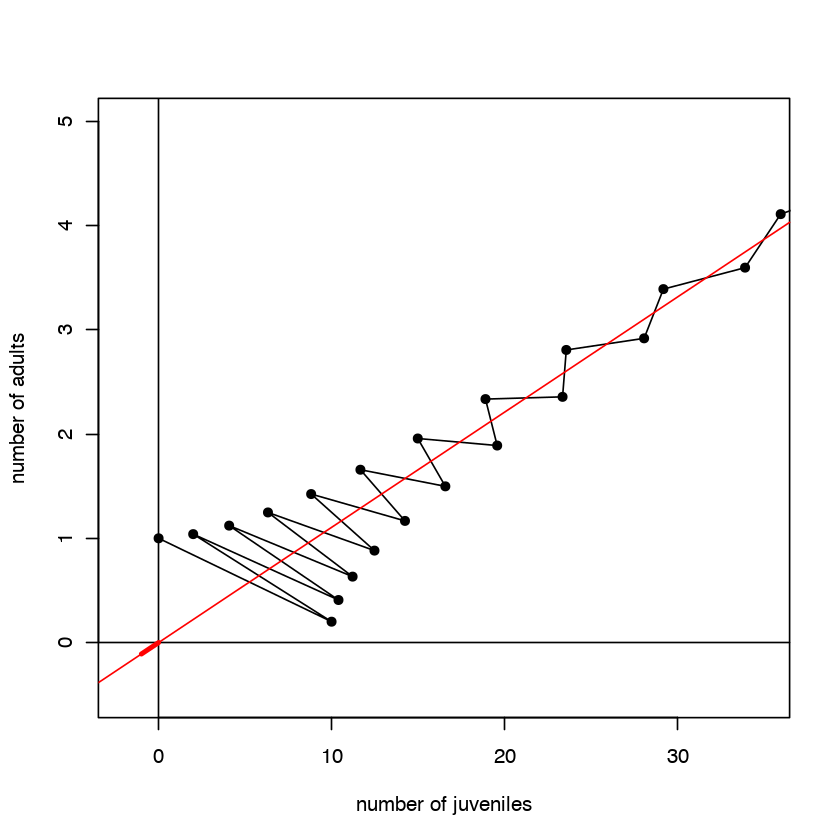

In [20]:
#### phase plane ####
# plot the number of juveniles on the x-axis and the number of adults on the y-axis
# because the eigenvector values are negative, include axes that also cover negative parts of the phase plane
plot(pop.vector[1,],pop.vector[2,],xlim=c(-2,35),ylim=c(-0.5,5),pch=16,xlab="number of juveniles",ylab="number of adults")
lines(pop.vector[1,],pop.vector[2,])
# draw the axes
abline(h=0)
abline(v=0)
# plot the leading eigenvector associated with the leading eigenvalue. This is plotting the vector from the origin, to the x-y coordinates represented by the elements of the eigenvector
lines(x=c(0,-0.9939504),y=c(0,-0.1098303),col="red",lwd=3) # the actual eigenvector is really short. 

# draw the extension of the eigenvector, according to the leading eigenvector's slope and intercept. The key point is that the population converges on this line.
# a specifies the intercept and b specifies the slope (=rise/run = adults/juveniles)
abline(a = 0,b = -0.1098303/-0.9939504,col="red")